In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
pip install nltk

Python interpreter will be restarted.
Collecting nltk
 Downloading nltk-3.5.zip (1.4 MB)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.7/site-packages (from nltk) (0.14.1)
Collecting click
 Downloading click-7.1.2-py2.py3-none-any.whl (82 kB)
Collecting regex
 Downloading regex-2020.11.13-cp37-cp37m-manylinux2014_x86_64.whl (719 kB)
Collecting tqdm
 Downloading tqdm-4.55.0-py2.py3-none-any.whl (68 kB)
Building wheels for collected packages: nltk
 Building wheel for nltk (setup.py): started
 Building wheel for nltk (setup.py): finished with status 'done'
 Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434675 sha256=4bc51e7ada17f196a699207a063f32c8067c4da4e051fc4df21671d32ad0097e
 Stored in directory: /root/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk
Installing collected packages: tqdm, regex, click, nltk
Successfully installed click-7.1.2 nltk-3.5 regex-2020.11.13 tqdm-4.55.0
Python interpreter will be restarted.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Unzipping corpora/stopwords.zip.

In [0]:
# Importing the reviews dataset

# col_names = ['review_id', 'business_id', 'user_id', 'text', 'stars', 'text length']

reviews_dataset = pd.read_csv('https://raw.githubusercontent.com/SivaSaiRam143/BDA_PROJECT/main/shortened.csv')
#display(reviews_dataset.head(3))
df=reviews_dataset[['review_id', 'business_id', 'user_id', 'text', 'stars']]
#df.head()
reviews_dataset=df
reviews_dataset.head()
reviews_dataset = reviews_dataset[reviews_dataset['text'].notna()]
reviews_dataset = reviews_dataset[reviews_dataset['stars'].notna()]
reviews_dataset.head()


Out[6]:

,review_id,business_id,user_id,text,stars
0,fWKvX83p0-ka4JS3dc6E5A,9yKzy9PApeiPPOUJEtnvkg,rLtl8ZkDX5vH5nAx9C3q5Q,My wife took me here on my birthday for breakf...,5
1,IjZ33sJrzXqU-0X6U8NwyA,ZRJwVLyzEJq1VAihDhYiow,0a2KyEL0d3Yb1V6aivbIuQ,I have no idea why some people give bad review...,5
2,IESLBzqUCLdSzSqm0eCSxQ,6oRAC4uyJCsJl1X0WZpVSA,0hT2KtfLiobPvh6cDC8JQg,love the gyro plate. Rice is so good and I als...,4
3,G-WvGaISbqqaMHlNnByodA,_1QQZuf4zZOyFCvXc0o6Vg,uZetl9T0NcROGOyFfughhg,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,1uJFq2r5QfJG_6ExMRCaGw,6ozycU1RpktNG2-1BroVtw,vYmM4KTsC8ZfQBg-j5MWkw,General Manager Scott Petello is a good egg!!!...,5


In [0]:
# Creating X and Y for the classifier. X is the review text and Y is the rating
x = reviews_dataset['text']
y = reviews_dataset['stars']

In [0]:
# Text preprocessing
import string
def text_preprocessing(text):
    no_punctuation = [ch for ch in text if ch not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [w for w in no_punctuation.split() if w.lower() not in stopwords.words('english')]

In [0]:
%%time
# Estimated time: 30 min

# Vectorization
# Converting each review into a vector using bag-of-words approach

from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(analyzer=text_preprocessing).fit(x)
x = vector.transform(x)

CPU times: user 13min 9s, sys: 2min 11s, total: 15min 20s
Wall time: 15min 23s

In [0]:
# Spitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle =False)

# Building Multinomial Naive Bayes modle and fit it to our training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

Out[10]: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Using our trained classifier to predict the ratings from text
# Testing our model on the test set

preds = classifier.predict(X_test)
print("Actual Ratings(Stars): ",end = "")
print(Y_test[:15])
print("Predicted Ratings: ",end = "")
print(preds[:15])

Actual Ratings(Stars): 19999 1
20000 5
20001 4
20002 5
20003 3
20004 5
20005 5
20006 5
20007 2
20008 5
20009 1
20010 5
20011 5
20012 1
20013 4
Name: stars, dtype: int64
Predicted Ratings: [4 4 4 4 5 5 5 4 3 5 1 5 5 1 4]

In [0]:
# Accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, preds)

Out[13]: 0.4998

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(Y_test, preds, average='weighted')))
print ('Recall: ' + str(recall_score(Y_test,preds, average='weighted')))

Precision: 0.4967185632637672
Recall: 0.4998

In [0]:
# Evaluating the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, preds))
print('\n')
print(classification_report(Y_test, preds))

[[ 149 58 40 106 37]
 [ 33 43 86 233 46]
 [ 12 16 107 556 95]
 [ 15 8 47 1233 412]
 [ 20 2 12 667 967]]


 precision recall f1-score support

 1 0.65 0.38 0.48 390
 2 0.34 0.10 0.15 441
 3 0.37 0.14 0.20 786
 4 0.44 0.72 0.55 1715
 5 0.62 0.58 0.60 1668

 accuracy 0.50 5000
 macro avg 0.48 0.38 0.40 5000
weighted avg 0.50 0.50 0.47 5000

In [0]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 149 58 40 106 37]
 [ 33 43 86 233 46]
 [ 12 16 107 556 95]
 [ 15 8 47 1233 412]
 [ 20 2 12 667 967]]
Normalized confusion matrix
[[0.38 0.15 0.1 0.27 0.09]
 [0.07 0.1 0.2 0.53 0.1 ]
 [0.02 0.02 0.14 0.71 0.12]
 [0.01 0. 0.03 0.72 0.24]
 [0.01 0. 0.01 0.4 0.58]]

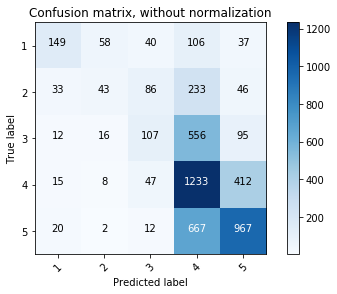

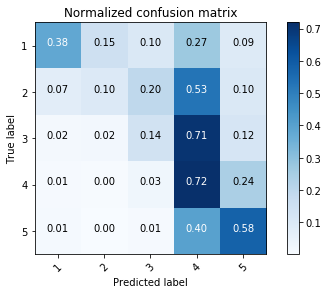

In [0]:
from sklearn import metrics
class_names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, preds
                                     )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
# Importing the datasets
reviews = reviews_dataset
reviews['text'] = reviews['text'].str[2:-2]

# Reducing the dataset to 2 classes i.e 1 and 5 star rating
reviews['stars'][reviews.stars == 3] = 1
reviews['stars'][reviews.stars == 2] = 1
reviews['stars'][reviews.stars == 4] = 5

#Undersampling of the dataset to get a balanced dataset
review1 = reviews[reviews['stars'] == 1]
review5 = reviews[reviews['stars'] == 5][0:34062]
frames = [review1, review5]
reviews = pd.concat(frames)

/local_disk0/tmp/1609058356431-0/PythonShell.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 # [ML-9441] We keep this launch script minimal because all classes and methods defined here are
/local_disk0/tmp/1609058356431-0/PythonShell.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 # registered under __main__, which will be replaced by a dummy module in the interactive shell.
/local_disk0/tmp/1609058356431-0/PythonShell.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [0]:
# Creating X and Y for the classifier. X is the review text and Y is the rating
x2 = reviews['text']
y2 = reviews['stars']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vector2 = CountVectorizer(analyzer=text_preprocessing).fit(x2)
x2 = vector.transform(x2)

In [0]:
# Spitting data into training and test set
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.30, random_state=0)

In [0]:
# Building Multinomial Naive Bayes modle and fit it to our training set
from sklearn.naive_bayes import MultinomialNB
classifier2 = MultinomialNB()
classifier2.fit(X2_train, Y2_train)

Out[22]: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Testing our model on the test set
Y2_pred = classifier2.predict(X2_test)

In [0]:
# Evaluating the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y2_test, Y2_pred))
print('\n')
print(classification_report(Y2_test, Y2_pred))

[[1446 951]
 [ 438 4665]]


 precision recall f1-score support

 1 0.77 0.60 0.68 2397
 5 0.83 0.91 0.87 5103

 accuracy 0.81 7500
 macro avg 0.80 0.76 0.77 7500
weighted avg 0.81 0.81 0.81 7500

In [0]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(Y2_test, Y2_pred)

Out[25]: 0.8148

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(Y2_test, Y2_pred, average='weighted')))
print ('Recall: ' + str(recall_score(Y2_test, Y2_pred, average='weighted')))

Precision: 0.8104807814796668
Recall: 0.8148

Confusion matrix, without normalization
[[1446 951]
 [ 438 4665]]
Normalized confusion matrix
[[0.6 0.4 ]
 [0.09 0.91]]

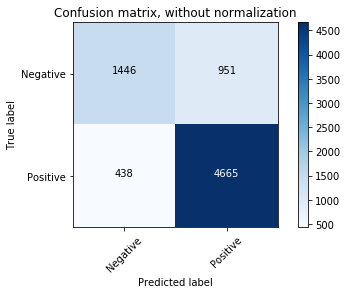

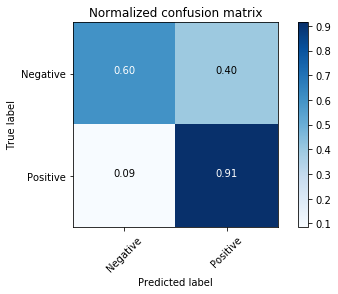

In [0]:
class_names = ['Negative','Positive']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y2_test, Y2_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()